In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gastimator import gastimator
import pandas as pd
from gastimator import priors
from gastimator import corner_plot
import math

In [2]:
data=pd.read_csv('Documents/Python.csv')

In [46]:
def power_law(values,x):
    ly=values[0]*(x)+values[1]
    return ly

In [34]:
radio=data['Radio Flux (Jy)']
radioerr=data['Radio Flux Uncertainty (Jy)']
mass100=data['Mass 100pc']
mass75=data['Mass 75pc']
mass50=data['Mass 50pc']

In [43]:
mcmccom=gastimator(power_law,np.log10(radio))

In [44]:
mcmccom.labels=np.array(['Index','Intercept'])
mcmccom.guesses=np.array([1.15,-2.5])
mcmccom.min=np.array([0.4,-3])
mcmccom.max=np.array([1.6,-1])
mcmccom.fixed=np.array([False,False])
mcmccom.precision=np.array([0.1,0.1])

In [45]:
nsamplescom=10000
outputvaluecom,outputllcom=mcmccom.run(np.log10(mass100),(data['Mass 100pc Error']/mass100)*0.434,nsamplescom,nchains=1,plot=False)

Doing chain 1
     Chain has not converged - Accept rate: 0.11
     Chain has not converged - Accept rate: 0.04
     Still varying: ['Index' 'Intercept']
     Chain has not converged - Accept rate: 0.05
     Target rate not reached
     Chain has not converged - Accept rate: 0.07
     Target rate not reached
     Chain has not converged - Accept rate: 0.09
     Target rate not reached
Chain converged: LL: -784184.8041280885 - Accept rate:0.35
Best chain so far!
Best fit:
  Index: 0.4000006322609743
  Intercept: -1.000001403766444
Starting final chain
Final best fit values and 1sigma errors:
  Index: 0.4000008348465315 + 1.2014452200337367e-06 - 5.981662247744879e-07
  Intercept: -1.0000076622069332 + 5.4372953885994946e-06 - 1.0450660661076583e-05


In [10]:
for a,b in zip(radio,radioerr):
    print(b/a)

nan
0.09999999999999999
0.10572687224669602
0.09999999999999999
0.13055555555555556
0.10408432147562584
0.16451612903225804
0.10077821011673152
0.10000000000000002
0.1
0.16
nan
0.10666666666666667
0.09999999999999999
0.1
0.1
0.11594202898550725
0.09999999999999999
0.1
0.11
5.0
1.0
0.1
0.1
0.8333333333333334
0.0970873786407767
0.09868421052631579
0.1
0.1
0.10749185667752442
0.10877192982456138
0.12
0.10096153846153846
0.10638297872340426
nan


In [11]:
print()

0            NaN
1      7820000.0
2     35900000.0
3      5600000.0
4       130000.0
5            NaN
6       887000.0
7            NaN
8      4770000.0
9      1410000.0
10     1160000.0
11      569000.0
12           NaN
13     6490000.0
14           NaN
15     7630000.0
16     3320000.0
17           NaN
18           NaN
19           NaN
20      189000.0
21     1830000.0
22     6160000.0
23     5410000.0
24       99500.0
25           NaN
26     4900000.0
27           NaN
28     1480000.0
29           NaN
30    15200000.0
31     1530000.0
32     2580000.0
33           NaN
34           NaN
Name: Mass 100pc Error, dtype: float64


In [241]:
np.savetxt('50pc.csv',outputvaluecom,delimiter=',')
np.savetxt('50pcll.csv',outputllcom,delimiter=',')

Quantiles:
[(0.16, 0.8034001508525899), (0.5, 0.8252113767227016), (0.84, 0.849622259311702)]
Quantiles:
[(0.16, -1.8159104716272767), (0.5, -1.798291854349988), (0.84, -1.7811484920900145)]


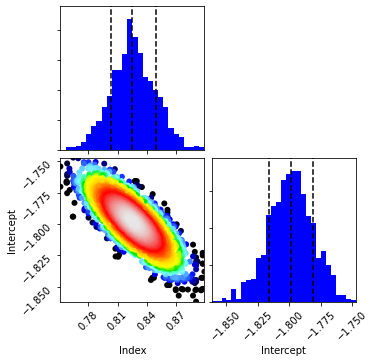

In [38]:
figurecom = corner_plot.corner_plot(outputvaluecom.T,like=outputllcom,labels=mcmccom.labels,quantiles=[0.16, 0.5, 0.84])

In [61]:
def powerlawplot(m,c,x):
    Y=m*np.log10(x/1e7)+np.log10(c)
    y=10**Y
    return y

In [53]:
x=np.logspace(5,9,100)
y=power_law([1.44,-12.07],np.log10(x))
#ymax=powerlawplot(1.19,8.72e-11,x)
#ymin=powerlawplot(1.176,7.34e-11,x)

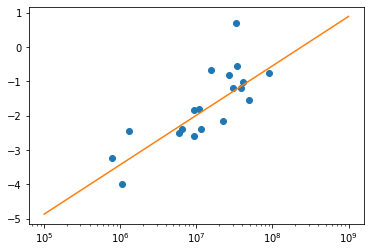

In [54]:
plt.semilogx(mass75,np.log10(radio),'o')
plt.plot(x,y)
#plt.fill_between(x,ymax,ymin,alpha=0.1)

In [97]:
tuple=list(zip(mass100,radio))
df=pd.DataFrame(tuple,columns=['Mass','Radio'])
dfnew=df.dropna()

In [98]:
np.polyfit(np.log10(dfnew['Mass']/1e7),np.log10(dfnew['Radio']),1)

array([ 1.15382558, -2.1214362 ])

In [99]:
print(np.log10(mass50))

0          NaN
1          NaN
2          NaN
3     7.117271
4     6.079181
5          NaN
6     6.482874
7          NaN
8     7.152288
9          NaN
10    6.439333
11    6.413300
12         NaN
13         NaN
14         NaN
15    7.428135
16         NaN
17         NaN
18         NaN
19         NaN
20    5.519828
21    6.790988
22    7.250420
23    7.235528
24    5.676694
25         NaN
26    7.113943
27         NaN
28    6.783189
29         NaN
30    7.639486
31    6.623249
32    6.812245
33         NaN
34         NaN
Name: Mass 50pc, dtype: float64


In [266]:
print(np.log10(radioerr))

0          NaN
1    -2.130768
2     0.000000
3    -0.313364
4    -3.327902
5    -2.102373
6    -3.292430
7    -0.285670
8    -2.182435
9     0.000000
10   -3.193820
11         NaN
12   -1.494850
13   -2.030584
14   -2.371611
15   -2.551294
16   -3.096910
17   -0.244125
18   -1.413413
19    0.383815
20   -3.301030
21   -2.397940
22   -2.198596
23   -1.557520
24   -3.301030
25   -2.000000
26   -1.823909
27   -2.634512
28   -2.815309
29   -2.481486
30   -1.730487
31   -2.744727
32   -1.677781
33   -2.397940
34         NaN
Name: Radio Flux Uncertainty (Jy), dtype: float64
